<a href="https://colab.research.google.com/github/aissam-out/Predicting-Heart-Disease/blob/master/Exploration_basic_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive #if needed
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.1MB/s 


In [0]:
link_to_train_values = 'https://drive.google.com/open?id=*************'
link_to_train_labels = 'https://drive.google.com/open?id=*************'

downloaded_train_v = drive.CreateFile({'id':'**************'}) 
downloaded_train_l = drive.CreateFile({'id':'**************'}) 

downloaded_train_v.GetContentFile('train_values.csv')
downloaded_train_l.GetContentFile('train_labels.csv')

# loading the dataset
df_train_v = pd.read_csv("train_values.csv")
df_train_l = pd.read_csv("train_labels.csv")

# Data Exploration

In [0]:
data = df_train_v.copy()
data['labels'] = df_train_l['heart_disease_present']
data.sample()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,labels
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [0]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'labels'],
      dtype='object')

# Training

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_train_v, df_train_l, test_size=0.2)

In [0]:
X_train['thal'] = X_train['thal'].replace({'normal':0,'reversible_defect':1, 'fixed_defect':2})
X_test['thal'] = X_test['thal'].replace({'normal':0,'reversible_defect':1, 'fixed_defect':2})
X_train = X_train.drop("patient_id", axis=1)
X_test = X_test.drop("patient_id", axis=1)
y_train = y_train.drop("patient_id", axis=1)
y_test = y_test.drop("patient_id", axis=1)

In [0]:
X_train.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
102,2,1,110,4,1,0,2,239,1.2,1,59,142,1
16,2,0,130,2,0,0,2,234,0.6,0,45,175,0
36,1,1,150,3,1,1,0,126,0.2,1,57,173,0
151,3,0,125,3,1,0,2,273,0.5,1,54,152,0
85,1,0,118,3,3,0,2,149,0.8,1,49,126,0


# +

In [0]:
import seaborn as sns
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools # needed in the confusion matrix

In [0]:
#convert to values
x_train = (X_train.values).astype('float32') 
y_train = y_train.values.astype('float32') 

In [0]:
x_test = (X_test.values).astype('float32') 
y_test = y_test.values.astype('float32') 

In [0]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

x_train shape: (144, 13)
144 train samples


In [0]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)

from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
from collections import Counter

sns.set(style = 'white' , context = 'notebook', palette = 'deep')
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [0]:
random_state = 2

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


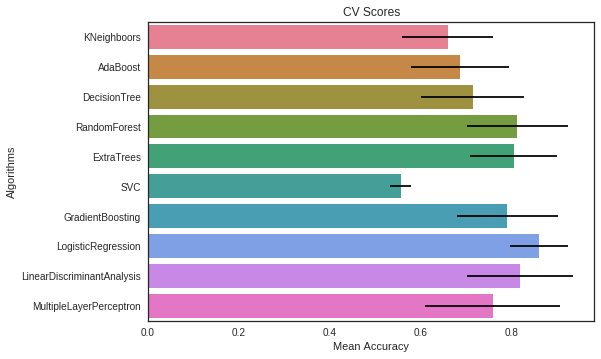

In [0]:
for model in models :
    cv_results.append(cross_val_score(model, x_train, y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     "MultipleLayerPerceptron"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

In [0]:
model_b = LinearDiscriminantAnalysis()
cv_result = cross_val_score(model, x_train, y_train, scoring = "accuracy", cv = K_fold, n_jobs=4)
cv_means = cv_result.mean()
cv_std = cv_result.std()

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithm": ["LinearDiscriminantAnalysis"]
    })

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


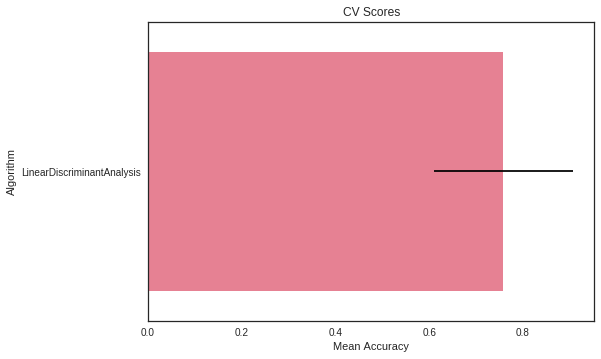

In [0]:
cv_plot = sns.barplot("CrossValMeans","Algorithm", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

In [0]:
cv_result

array([0.6875    , 0.86666667, 0.6       , 0.78571429, 0.92857143,
       0.85714286, 0.92857143, 0.71428571, 0.78571429, 0.42857143])

In [0]:
# GBC Classifier
GBC_Model = GradientBoostingClassifier()

scores = cross_val_score(GBC_Model, x_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.8125     0.8        0.86666667 0.78571429 0.78571429 0.92857143
 0.85714286 0.64285714 0.85714286 0.78571429]


81.22

In [0]:
# Linear Discriminant Analysis 
LDA_Model= LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, x_train, y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.875      0.8        0.86666667 0.78571429 0.85714286 0.85714286
 0.92857143 0.5        0.92857143 0.78571429]


81.85

In [0]:
# Logistic Regression
#
Log_Model = LogisticRegression(C=1)
scores = cross_val_score(Log_Model, x_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.875      0.86666667 0.86666667 0.85714286 0.85714286 0.92857143
 0.92857143 0.71428571 0.92857143 0.78571429]


86.08

In [0]:
# Random Forest Classifier Model
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, x_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.8125     0.8        0.8        0.78571429 0.78571429 0.85714286
 0.85714286 0.64285714 0.78571429 0.64285714]


77.7

In [0]:
# Gaussian Naive Bayes
GNB_Model = GaussianNB()

scores = cross_val_score(GNB_Model, x_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.875      0.8        0.86666667 0.85714286 1.         0.78571429
 0.92857143 0.57142857 0.85714286 0.78571429]


83.27

In [0]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, x_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.5625     0.53333333 0.53333333 0.57142857 0.57142857 0.57142857
 0.57142857 0.57142857 0.5        0.57142857]


55.58

In [0]:
from sklearn.metrics import accuracy_score

# Fit
GNB_Model.fit(x_train, y_train)

y_pred_gnb = GNB_Model.predict(x_test)

# Accuracy
acc = accuracy_score(y_test, y_pred_gnb)
acc

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6944444444444444

In [0]:
y_pred_gnb[0]

0.0

In [0]:
y_pred_gnb_log_proba = GNB_Model.predict_proba(x_test)
y_pred_gnb_log_proba

array([[9.99276271e-01, 7.23728785e-04],
       [5.32490940e-02, 9.46750906e-01],
       [9.98819084e-01, 1.18091636e-03],
       [9.71672748e-01, 2.83272522e-02],
       [7.18951318e-01, 2.81048682e-01],
       [9.87987314e-01, 1.20126861e-02],
       [4.69364637e-01, 5.30635363e-01],
       [9.99303546e-01, 6.96453780e-04],
       [9.61103526e-01, 3.88964739e-02],
       [9.99312920e-01, 6.87079937e-04],
       [9.96142730e-01, 3.85726956e-03],
       [9.66494911e-01, 3.35050888e-02],
       [9.97687297e-01, 2.31270337e-03],
       [9.86700083e-01, 1.32999168e-02],
       [2.25037978e-01, 7.74962022e-01],
       [6.31634197e-06, 9.99993684e-01],
       [3.14551143e-02, 9.68544886e-01],
       [7.53573307e-01, 2.46426693e-01],
       [1.49396924e-03, 9.98506031e-01],
       [1.53558611e-02, 9.84644139e-01],
       [1.05990358e-02, 9.89400964e-01],
       [5.87699447e-01, 4.12300553e-01],
       [2.51072794e-02, 9.74892721e-01],
       [1.63921212e-01, 8.36078788e-01],
       [3.830958

In [0]:
# Logistic Regression
#
Log_Model = LogisticRegression(C=1)
scores = cross_val_score(Log_Model, x_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [0]:
from sklearn.metrics import accuracy_score

LR_Model = LogisticRegression(C=1, solver='liblinear')
# Fit
LR_Model.fit(x_train, np.ravel(y_train))

y_pred_LR = LR_Model.predict(x_test)

# Accuracy
acc_LR = accuracy_score(np.ravel(y_test), np.ravel(y_pred_LR))
acc_LR

0.7222222222222222